In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
#Loading data
data_train = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
data_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
m =  len(data_train)
m

1460

In [4]:
#Selecting relavent data
data = data_train[["LotArea", "SalePrice"]]
data

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


In [5]:
#Shuffling data
shuffled_data = data.sample(frac=1).reset_index(drop=True)
shuffled_data

,LotArea,SalePrice
0,8400,129000
1,8532,153000
2,8450,179000
3,10237,178900
4,14000,328000
...,...,...
1455,9017,192000
1456,11764,290000
1457,14781,275000
1458,13869,177000


In [6]:
#Splitting the data into test and training set
X = shuffled_data["LotArea"]
y = shuffled_data["SalePrice"]
X_train = X[:1000]
y_train = y[:1000]
X_test = X[1000:]
y_test = y[1000:]

In [7]:
X_train, y_train, X_test, y_test

(0       8400
 1       8532
 2       8450
 3      10237
 4      14000
        ...  
 995     9200
 996     8640
 997    11457
 998    16560
 999    12046
 Name: LotArea, Length: 1000, dtype: int64,
 0      129000
 1      153000
 2      179000
 3      178900
 4      328000
         ...  
 995    315000
 996    215200
 997    175000
 998    239000
 999    195000
 Name: SalePrice, Length: 1000, dtype: int64,
 1000     8500
 1001     7500
 1002    10410
 1003    11000
 1004    11100
         ...  
 1455     9017
 1456    11764
 1457    14781
 1458    13869
 1459     8471
 Name: LotArea, Length: 460, dtype: int64,
 1000    179600
 1001    176000
 1002    135000
 1003    154000
 1004     84900
          ...  
 1455    192000
 1456    290000
 1457    275000
 1458    177000
 1459    151000
 Name: SalePrice, Length: 460, dtype: int64)

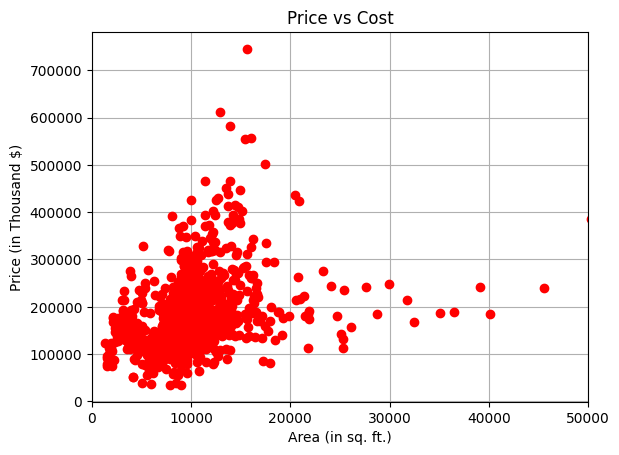

In [8]:
#Plotting unregularised data
plt.plot(X_train, y_train, 'o', c="red")
plt.title("Price vs Cost")
plt.xlabel("Area (in sq. ft.)")
plt.ylabel("Price (in Thousand $)")
plt.xlim(0,50000)
plt.grid()
plt.show()

In [9]:
#Regularization
X_max = max(X_train)
y_max = max(y_train)

X_train = X_train / X_max
y_train = y_train / y_max


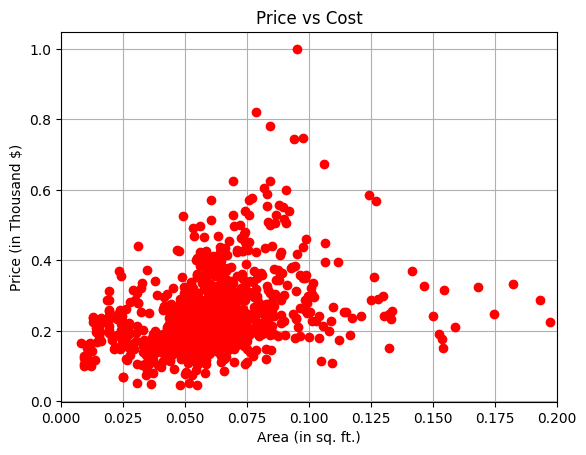

In [10]:
#Plotting regularized data
plt.plot(X_train, y_train, 'o', c="red")
plt.title("Price vs Cost")
plt.xlabel("Area (in sq. ft.)")
plt.ylabel("Price (in Thousand $)")
plt.xlim(0,0.2)
plt.grid()
plt.show()

In [11]:
#Making all the necessary functions

def pick_weights_and_biases():
    w = np.random.rand()
    b = np.random.rand()
    return w, b


def calculate_cost(X_data, y_data, w, b):
    cost = 0
    m = len(X_data)
    for i in range(m):
        f_wb = (w * X_data[i]) + b
        cost += (f_wb - y_data[i]) ** 2
    cost = cost / (2 * m)
    return cost

def calculate_gradient(X_data, y_data, w, b):
    dj_dw = 0
    dj_db = 0
    m = len(X_data)
    for i in range(m):
        f_wb = (w * X_data[i]) + b
        dj_dw_i = (f_wb - y_data[i]) * X_data[i]
        dj_db_i = (f_wb - y_data[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

def gradient_descent(X_data, y_data, w, b, alpha, iterations):
    for i in range(iterations):
        dj_dw, dj_db = calculate_gradient(X_data, y_data, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        if i%100 == 0:
            print(f" i = {i} ---> cost = {calculate_cost(X_data, y_data, w, b)}")
    return w, b

In [12]:
#Putting everything together
w_initial, b_initial = pick_weights_and_biases()

print(f"Before gradient descent: \n w = {w_initial} \n b = {b_initial}")
print(f"Cost (before gradient descent): {calculate_cost(X_train, y_train, w_initial, b_initial)}")
w_final, b_final = gradient_descent(X_train, y_train, w_initial, b_initial, 0.3, 1000)
print(f"After gradient descent: \n w = {w_final} \n b = {b_final}")
print(f"Cost (after gradient descent): {calculate_cost(X_train, y_train, w_final, b_final)}")

Before gradient descent: 
 w = 0.6500613029878427 
 b = 0.5440594526270404
Cost (before gradient descent): 0.06420018472275922
 i = 0 ---> cost = 0.034049918612840006
 i = 100 ---> cost = 0.00527739087858243
 i = 200 ---> cost = 0.005276715288212079
 i = 300 ---> cost = 0.005276134675685694
 i = 400 ---> cost = 0.005275635688547047
 i = 500 ---> cost = 0.005275206851494413
 i = 600 ---> cost = 0.005274838302480891
 i = 700 ---> cost = 0.005274521565915035
 i = 800 ---> cost = 0.0052742493577460315
 i = 900 ---> cost = 0.005274015417951079
After gradient descent: 
 w = 0.592974954884391 
 b = 0.20440926985615857
Cost (after gradient descent): 0.005273816230041889


In [13]:
predicted = np.zeros(1000)
for i in range(1000):
    predicted[i] = (w_final * X_train[i]) + b_final

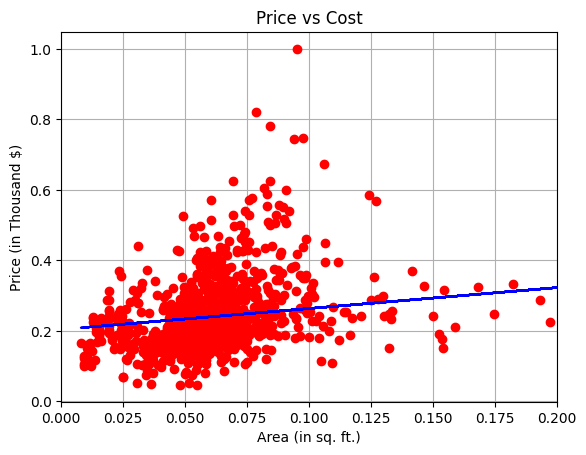

In [14]:
#Plotting regularized prediction
plt.plot(X_train, y_train, 'o', c="red")
plt.title("Price vs Cost")
plt.plot(X_train, predicted, c="blue")
plt.xlabel("Area (in sq. ft.)")
plt.ylabel("Price (in Thousand $)")
plt.xlim(0,0.2)
plt.grid()
plt.show()

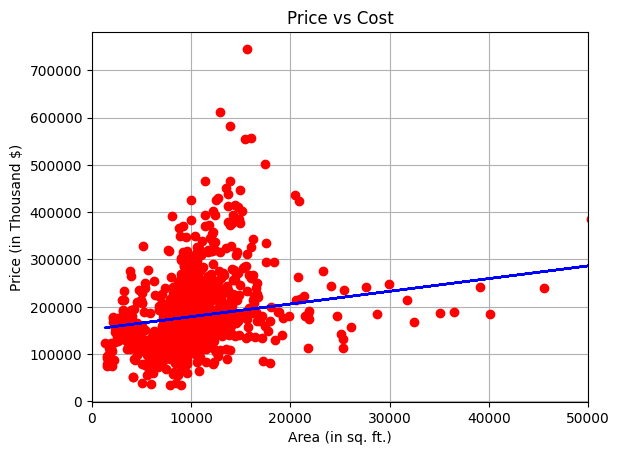

In [15]:
#Plotting unregularized(orignal) prediction
plt.plot(X_train * X_max, y_train * y_max, 'o', c="red")
plt.title("Price vs Cost")
plt.plot(X_train * X_max, predicted * y_max, c="blue")
plt.xlabel("Area (in sq. ft.)")
plt.ylabel("Price (in Thousand $)")
plt.xlim(0,50000)
plt.grid()
plt.show()

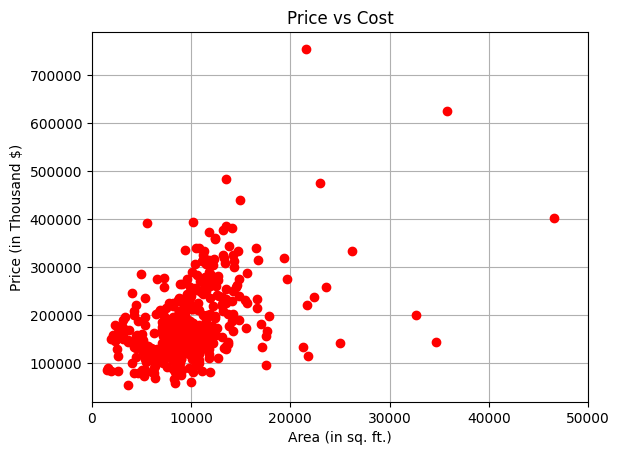

In [16]:
#Plotting test data
plt.plot(X_test, y_test, 'o', c="red")
plt.title("Price vs Cost")
plt.xlabel("Area (in sq. ft.)")
plt.ylabel("Price (in Thousand $)")
plt.xlim(0,50000)
plt.grid()
plt.show()

In [17]:
#Regularizing the text data

X_test_normalized = X_test / X_max
y_test_normalized = y_test / y_max


In [18]:
y_preds_normalized = (w_final * X_test_normalized) + b_final
y_preds = y_preds_normalized * y_max
y_preds

1000    175089.557457
1001    172406.657290
1002    180213.896774
1003    181796.807873
1004    182065.097889
            ...      
1455    176476.616843
1456    183846.543600
1457    191940.853401
1458    189494.048450
1459    175011.753352
Name: LotArea, Length: 460, dtype: float64

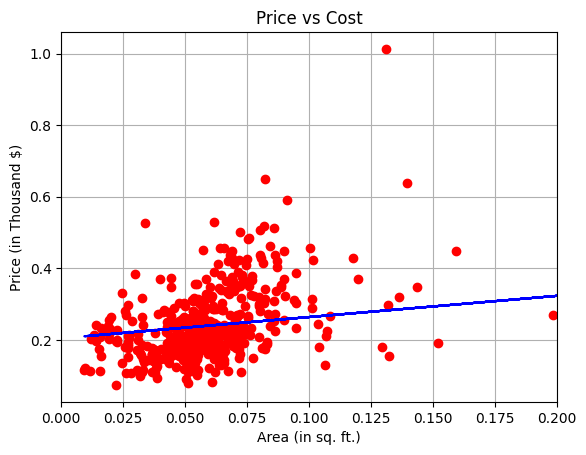

In [19]:
#Plotting regularized prediction
plt.plot(X_test_normalized, y_test_normalized, 'o', c="red")
plt.title("Price vs Cost")
plt.plot(X_test_normalized, y_preds_normalized, c="blue")
plt.xlabel("Area (in sq. ft.)")
plt.ylabel("Price (in Thousand $)")
plt.xlim(0,0.2)
plt.grid()
plt.show()

In [20]:
y_test

1000    179600
1001    176000
1002    135000
1003    154000
1004     84900
         ...  
1455    192000
1456    290000
1457    275000
1458    177000
1459    151000
Name: SalePrice, Length: 460, dtype: int64

In [21]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_normalized, y_preds_normalized)
print("Mean Squared Error (regularized):", mse)


mse_unregularized = mean_squared_error(y_test, y_preds)
print("Mean Squared Error (unregularized):", mse_unregularized)

Mean Squared Error (regularized): 0.010819601872743995
Mean Squared Error (unregularized): 6005149529.419737
